## Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План анализа

1. [Изучить общую информацию](#info)
2. [Выполнить предобработку данных](#data)
3. [Провести исследовательский анализ данных](#eda)
4. [Составить портрет пользователя по регионам: Северная Америка (NA), Европа (EU), Япония (JP)](#user)
5. [Проверить гипотезы о средних пользовательских рейтингах](#check)
6. [Сделать общий вывод по проекту](#conclusion)

<a id="info"></a>
# 1. Общая информация

In [1]:
#  импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# установить общие настройки
sns.set()

In [2]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# изучим размер датасета
games.shape

(16715, 11)

In [5]:
# выделим крайние даты
games.Year_of_Release.agg(['min', 'max'])

min    1980.0
max    2016.0
Name: Year_of_Release, dtype: float64

In [6]:
# изучим общую информацию
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<h3>Вывод</h3>

Таблица с данными состоит из 11 столбцов и 16715 строк. Данные о компьютерных играх собраны за период 1980-2016 годы. Есть как численные, так и строковые значения.

Из общего анализа видно, что есть пропущенные значения в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Последние три столбца содержат от 40% до 51% пропусков. Причина может быть связана с отсутствием в самих данных этих рейтингов, в непопулярности игры или если в какой-то момент игр выходило так много, что пользователи и критики не успевали оценить все. 

Помимо пропусков, в исходном датасете необходимо преобразовать тип данных в столбцах Year_of_Release и User_Score и привести названия столбцов к нижнему регистру для упрощения работы с данными.

<a id="data"></a>
# 2. Предобработка данных

<h4>Обработка пропусков и изменение типов данных</h4>

In [4]:
# приведем к нижнему регистру названия столбцов
games.columns = map(str.lower, games.columns)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# сохраним датасет со всеми названиями игр
games = games[games['name'].notnull()]
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [6]:
# проверим унивальные значения столбца year_of_release и пересохраним датасет без пропусков
print(games.year_of_release.unique())
games = games[games['year_of_release'].notnull()]

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [12]:
# проверим уникальные значения столбца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# заменим тип данных и некорректные значения на NaN
games.year_of_release = games.year_of_release.astype('int')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [15]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<h4>Создать столбец с глобальными продажами</h4>

In [9]:
def total_sum(row):
    total_sum = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return total_sum
games['total_sales'] = games.apply(total_sum, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<h3>Вывод</h3>

На втором этапе работы с датасетом был изменен регистр в названиях столбцов, а также преобразованы данные в столбцах <b>year_of_release</b> (с float на int) и <b>user_score</b> (с object на int). В последнем случае среди уникальных значений были обнаружены значения <b>'tbd'</b> (to be determined), которые причислены к NaN в ходе преобразования to_numeric с заменой некорректных значений на пропуски (errors='coerce').

В данных обнаружены два пропуска в столбцах name и genre, котоыре были опущены. Также были опущены NaN в столбце <b>year_of_release</b>, т.к. составляли примерно 1,6% от всего датасета.

Пропуски в столбцах <b>critic_score</b>, <b>user_score</b>, <b>rating</b> были оставлены без изменений, т.к. в дальнейшем эти данные будут использованы для определения среднего рейтинга и его влияния на продажи. Поэтому важно сохранить среднее и медиану в их первоначальном виде. Пропуски могли возникнуть из-за некорректной выгрузки, непопулярности игры или для игр, вышедших одновременно с большим количеством других игр.

Наконец, добавлен столбец с глобальными продажами по каждой игре, который позволит проанализировать общие продажи в разные годы или на конкретных платформах.

<a id="eda"></a>
# 3. Исследовательский анализ данных

In [10]:
# посчитаем количество вышедших игр и проданных копий за все годы
produced = games.groupby('year_of_release')[['total_sales']].sum().join(
    games.groupby('year_of_release')[['name']].count()
)
produced.columns = ['total_sales', 'number_of_games']
produced.sort_values(by='number_of_games', ascending=False).head()

,total_sales,number_of_games
year_of_release,,
2008,671.50,1427
2009,658.82,1426
2010,590.13,1255
2007,604.75,1197
2011,507.58,1136


<AxesSubplot:xlabel='year_of_release'>

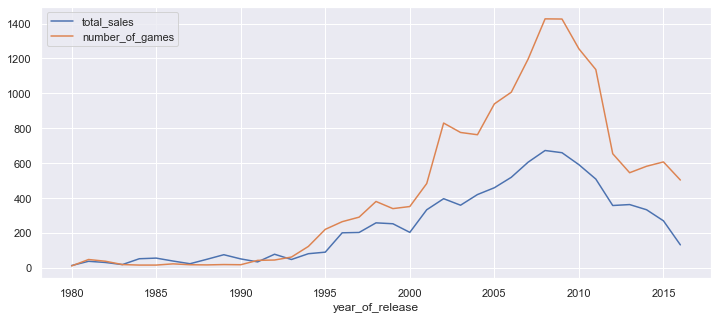

In [11]:
produced.plot(figsize=(12, 5))

In [19]:
# платформы, представленные в датасете
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
# Прибыльные платформы за весь период (топ-15)
p = games.pivot_table(index='platform',
              values='total_sales',
              aggfunc='count').sort_values(by='total_sales', ascending=False).head(15).reset_index()
p

,platform,total_sales
0,PS2,2127
1,DS,2121
2,PS3,1306
3,Wii,1286
4,X360,1232
5,PSP,1193
6,PS,1190
7,PC,957
8,GBA,811
9,XB,803


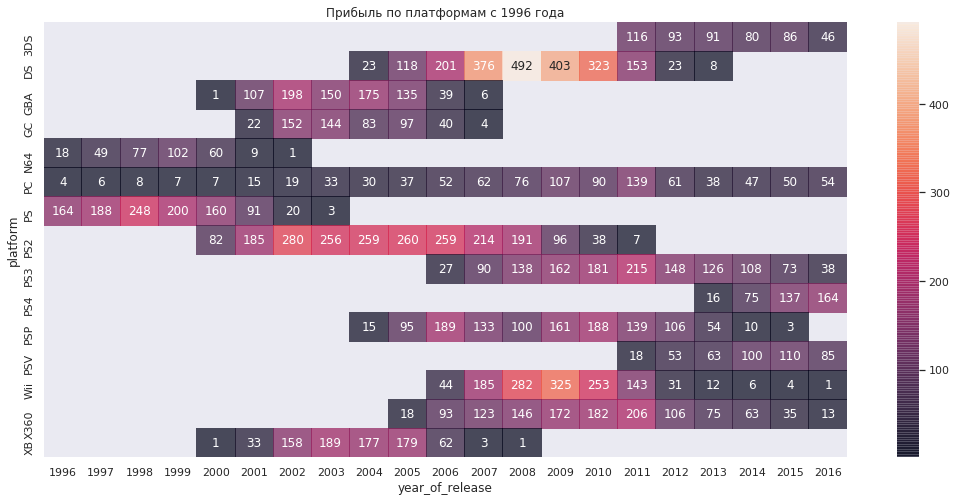

In [49]:
# самые прибыльные игры топ-15 за последние 20 лет
test = games.query('(platform in @p.platform) and year_of_release >= 1996').pivot_table(index='platform', 
                                                                                    columns='year_of_release',
                                                                                    values='total_sales',
                                                                                    aggfunc='count')

plt.figure(figsize=(18,8))
plt.title('Прибыль по платформам с 1996 года')
ax = sns.heatmap(test, annot=True, alpha=0.7, fmt=".0f")

In [23]:
# средняя продолжительность существования одной платформы
years = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
years['long'] = years['max'] - years['min']
years.long.mean()

7.612903225806452

<h4>Данные актуального периода (с 2008 по 2016 годы)</h4>

In [24]:
# платформы с 2008 года (актуальный период)
modern = games.query('year_of_release >= 2008')

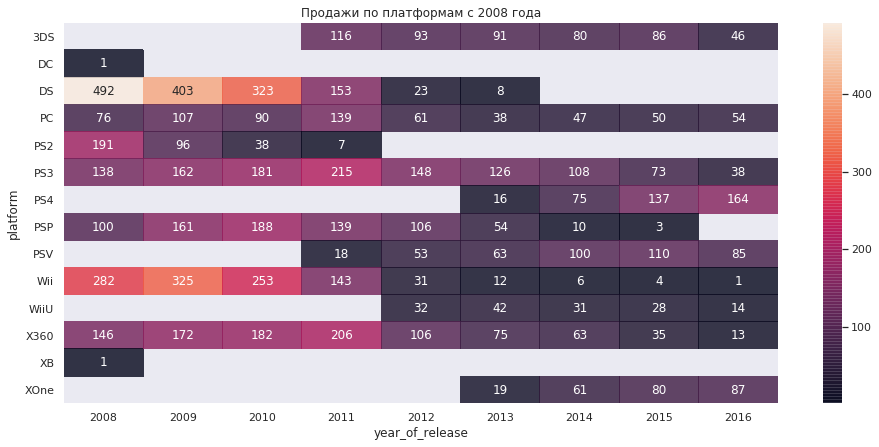

In [50]:
# лидирующие платформы
lead = modern.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='count')
plt.figure(figsize=(16,7))
plt.title('Продажи по платформам с 2008 года')
ax1 = sns.heatmap(lead, annot=True, alpha=0.8, fmt=".0f")

In [26]:
# перспективные платформы, чья прибыль больше 1 млн долларов
leaders = ['PC', 'PS4', 'PSV', 'WiiU', 'XOne', '3DS', 'PS3', 'X360']

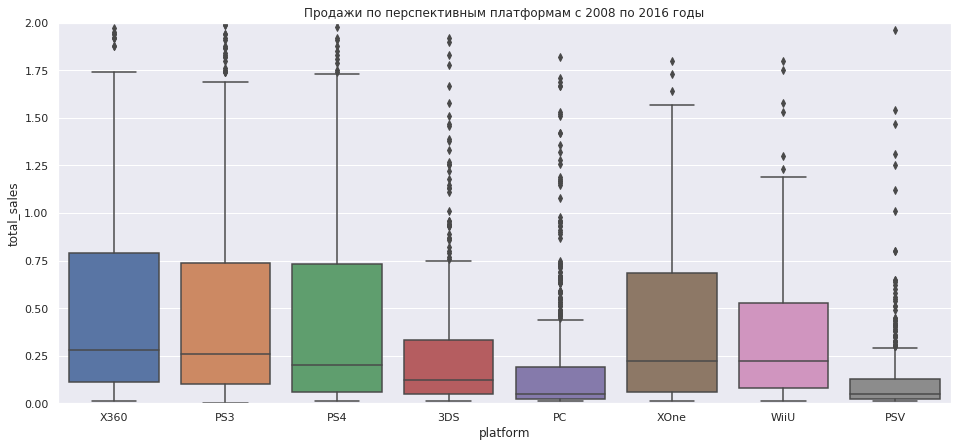

In [27]:
# боксплот для перспективных платформ
report = modern.query('platform in @leaders')
plt.figure(figsize=(16,7))
plt.title('Продажи по перспективным платформам с 2008 по 2016 годы')
plt.ylim(0, 2)
sns.boxplot(y='total_sales', x='platform', data=report)

In [28]:
# перспективные платформы после 2008, среднее по выручке
report.groupby('platform')['total_sales'].mean().to_frame().sort_values(by='total_sales', ascending=False).head(8)

,total_sales
platform,
X360,0.807575
PS4,0.801378
PS3,0.704113
XOne,0.645020
WiiU,0.559116
3DS,0.503535
PC,0.228535
PSV,0.125431


<h4>Данные платформы PS4</h4>

In [29]:
# Популярная платформа PS4, существует с 2013 года, выручка за 2016 год составляет 160 млн долларов
ps4 = report.query('platform == "PS4"')
ps4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


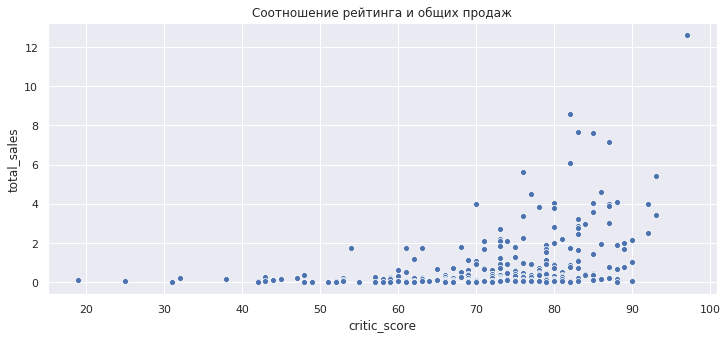

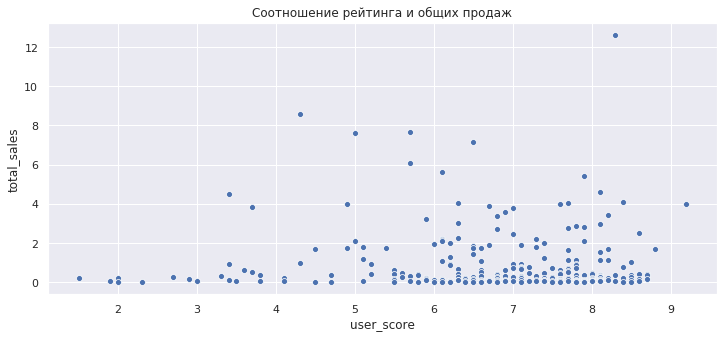

In [30]:
# влияние отзывов пользователей и критиков на продажи (выводы)
for col in ps4[['critic_score', 'user_score']]:
    plt.figure(figsize=(12,5))
    plt.title('Соотношение рейтинга и общих продаж')
    sns.scatterplot(x=col, y='total_sales', data=ps4)
    plt.show()

In [31]:
# обобщенные данные по остальным платформам
others = report.query('platform != "PS4"')
others[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.583601,0.341492
user_score,0.583601,1.000000,0.083130
total_sales,0.341492,0.083130,1.000000


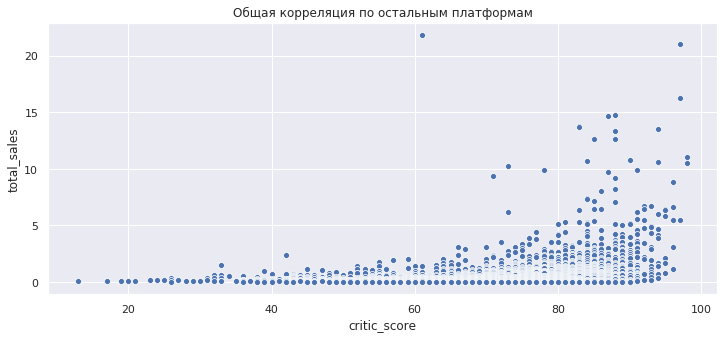

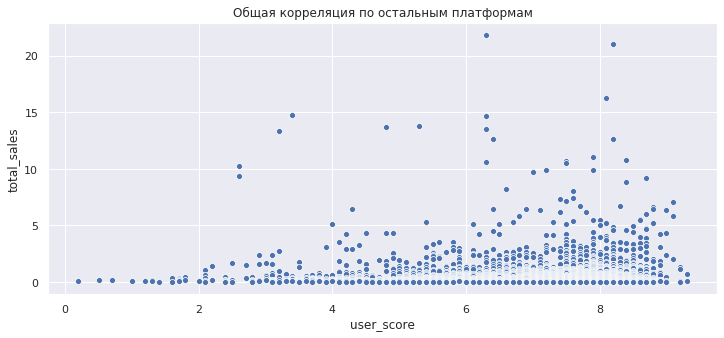

In [32]:
for col in others[['critic_score', 'user_score']]:
    plt.figure(figsize=(12,5))
    plt.title('Общая корреляция по остальным платформам')
    sns.scatterplot(x=col, y='total_sales', data=others)
    plt.show()

In [33]:
# прибыльные жанры актуального периода(после 2008)
report.groupby('genre')['total_sales'].sum().sort_values(ascending=False).to_frame()

,total_sales
genre,
Action,748.00
Shooter,581.40
Sports,337.26
Role-Playing,297.53
Misc,166.31
Racing,150.89
Fighting,110.66
Platform,100.14
Simulation,72.70


Text(0, 0.5, 'total_sales')

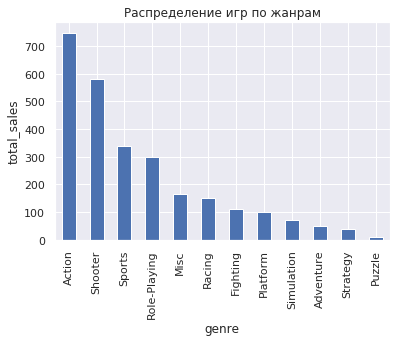

In [34]:
report.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                               title='Распределение игр по жанрам')
plt.ylabel('total_sales')

<h3>Вывод</h3>

В общем датасете собраны данные за 1980-2016 годы. Однако после анализа <b>количества игр</b>, выпущенных в каждый из этих лет, можно сказать, что более значим отрезок после 1995 года: если в 1995 году было выпущено 219 игр и общая прибыль составила 88.12 млн долларов, то в 1996 году на 263 играх производители заработали 199.15 млн долларов. Самое большое количество игр (и выручка по ним) приходится на 2008 и 2009 годы. Затем виден спад как выпущенных игр, так и общей прибыли, который мог быть вызван экономическим кризисом и одновременным переформатированием рынка (больший ориентир на онлай-игры).

Если рассматривать самые прибыльные <b>платформы</b>, начиная с 1980 года, то топ-5 занимают:

- *PS2 с суммарными продажами на 2127 млн долларов*,
- *DS - 2121 млн долларов*,
- *PS3 - 1306 млн долларов*,
- *Wii - 1286 млн долларов*,
- *X360 - 1232 млн долларов*.

Однако средний срок жизни платформы равен 7.6 лет, значит, к 2016 году большинство игроков на рынке компьютерных игр должно поменяться. В качестве <b>актуального периода</b> выбран отрезок с 2008 по 2016 годы. Потенциально прибыльными платформами можно обозначить платформы PC, PS4, PSV, WiiU, XOne, 3DS, PS3, X360, т.к. их выручка за прошедший период 2016 года составляет от 13 до 160 $млн. 

Лидеры по продажам в текущем 2016 году:

- платформа PS4 (160 млн долларов),
- платформа XOne (87 млн долларов),
- платформа PSV (85 млн долларов).

Выручка постепенно уменьшается на платформах 3DS, PS3, PSV, Wii (6 и 4 млн долларов в 2014 и 2015 годах), WiiU, X360.

Прибыль больше, чем в 2015 году, на платформах PC, PS4, XOne. 

Самые высокие медианы по продажам: X360 и PS3 (около 0.26 млн долларов за игру), затем PS4, XOne и WiiU (около 0.24 млн долларов за игру), затем 3DS (примерно 0.12 млн долларов за игру), наконец, PC и PSV (ок. 0.05 млн долларов за игру). 
Если сравнить показатели медианы со средним значением по каждой платформе, то самые высокие показатели сохраняются за X360 (0.81), затем PS4 (0.8) и PS3 (0.7). Самые низкие остаются за PC и PSV. При этом показатели медианы и среднего отличаются друг от друга в несколько раз, что говорит о наличии значительных выбросов (игр - лидеров продаж).

В качестве примера взята платформа PS4 (входит в тройку лидеров по средней стоимости игры, самая прибыльная платформа за 2015 и 2016 годы). Корреляция между общими продажами и оценкой критиков слабая положительная (0.41), тогда как корреляция между оценками пользователей и общими прожадами близка к нулю (-0.03). Из диаграммы рассеяния видно, что более высокие оценки критиков связаны с более высоким уровнем продаж отдельных игр, хотя в целом зависимость этих показателей минимальна.

По остальным перспективным платформам корреляция следующая: оценка критиков и общие продажи коррелируют на 0.34, рейтинг пользователей и продажи - на 0.08. Т.е. в целом заметна очень слабая положительная связь в первом случае и близкая к нулю - во втором. Также из графиков видно, как увеличиваются по мере роста оценки критиков и пользователей сумма продаж. 

Если говорить о жанрах, то в течение анализируемого периода топ-3 популярных жанров - это Action, Shooter и Sports. Менее популярны Puzzle и Strategy. Предпочтения пользователи отдают более динамичным играм.

<a id="user"></a>
# 4. Анализ пользователей по регионам

In [35]:
# прибыль по популярным платформам в трех регионах за 2008-2016 годы
(report.pivot_table(index='platform', 
                             values='na_sales', 
                             aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
 .join(report.pivot_table(index='platform', 
                                   values='eu_sales', 
                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(), how='outer')
 .join(report.pivot_table(index='platform', 
                                   values='jp_sales', 
                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(), how='outer')).fillna(0)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
PC,0.00,92.17,0.00
PS3,349.13,293.73,74.11
PS4,108.74,141.09,15.96
PSV,0.00,0.00,21.84
WiiU,0.00,0.00,13.01
X360,490.69,234.88,0.00
XOne,93.12,0.00,0.00


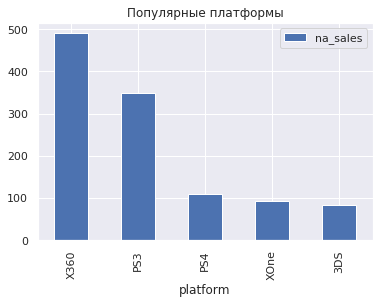

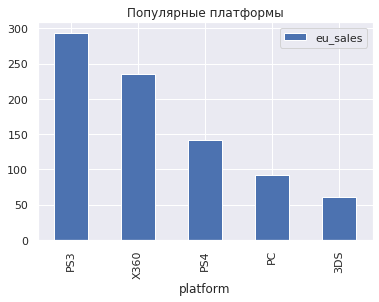

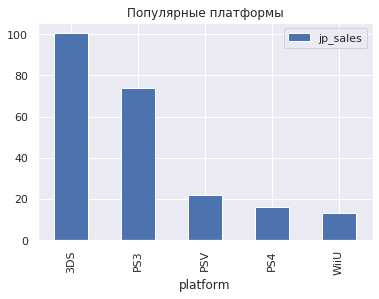

In [36]:
# Популярные платформы в трех регионах (топ-5)
for col in report[['na_sales', 'eu_sales', 'jp_sales']]:
    report.pivot_table(index='platform',
                                values=col,
                                aggfunc='sum').sort_values(by=col, ascending=False).head().plot(kind='bar')
    plt.title('Популярные платформы')
    plt.show()

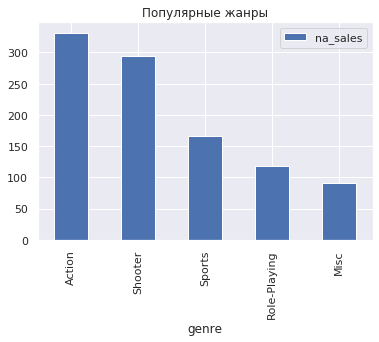

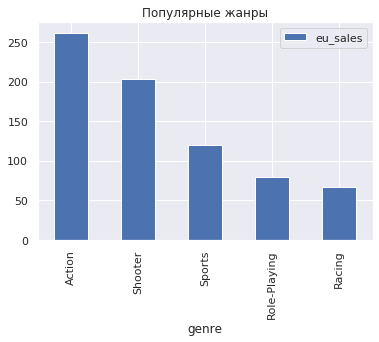

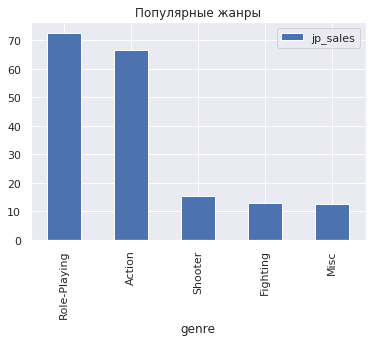

In [37]:
# Самые популярные жанры по трем регионам
for col in report[['na_sales', 'eu_sales', 'jp_sales']]:
    report.pivot_table(index='genre',
                                values=col,
                                aggfunc='sum').sort_values(by=col, ascending=False).head().plot(kind='bar')
    plt.title('Популярные жанры')
    plt.show()

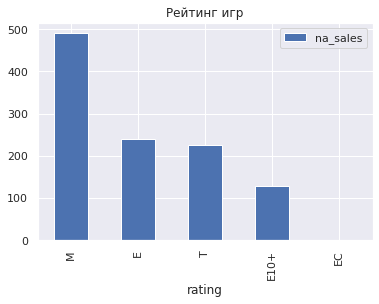

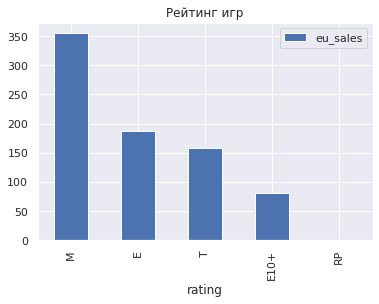

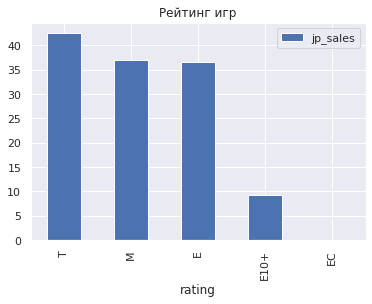

In [38]:
# какие рейтинги встречаются в регионах
for col in report[['na_sales', 'eu_sales', 'jp_sales']]:
    report.pivot_table(index='rating',
                                values=col,
                                aggfunc='sum').sort_values(by=col, ascending=False).head().plot(kind='bar')
    plt.title('Рейтинг игр')
    plt.show()

<h3>Вывод</h3>

В этой части анализа выделены три основных региона: Северная Америка, Европа, Япония. 

Типичный пользователь, проживающий в <b>Северной Америке</b>, использует платформы X360 (490 млн долларов), PS3 (349), PS4 (108), XOne (93), 3DS (83), выбирает жанры Action, Shooter, Sports, Role-Playing, Misc. Основной рейтинг этих игр относится к M (материалы игры не подходят для подростков младше 17 лет), E (для всех от 6 лет и старше), T (для подростков от 13 лет и старше), E10+ (от 10 лет и старше). 

Типичный пользователь, проживающий в <b>Европе</b>, использует платформы PS3 (294), X360 (235), PS4 (141), PC (92), 3DS (61), выбирает игры жанров Action, Shooter, Sports, Role-Playing, Racing.  Основной рейтинг этих игр совпадает с данными по Северной Америке (M, E, T, E10+).

В отличие от Северной Америки и Европы, пользователи в <b>Японии</b> предпочитают платформы 3DS (101), PS3 (74), PSV (22), PS4 (16), WiiU (13), а рейтинг популярных жанров выглядит так: Role-Playing, Action, Shooter, Fighting, Misc. В соответствии с жанрами игр рейтинги начинаются с игр для подростков (T), затем идут M, E, E10+.

Различия в предпочтениях по платформам связаны с тем, что линейка PS (Sony) популярна во всем мире, тогда как поколения игровых консолей Xbox (американская компания Microsoft), 3DS и Wii U (японская компания Nintendo) больше привязаны к регионам производства. Поэтому, например, доля X360 в Северной Америке составляет 490 млн долларов, в Европе - 235, а в Японии вообще не входит в топ-5 платформ. В Японии лидирующе место занимает 3DS (101 млн долларов) компании Nintendo.

Жанровые предпочтения можно объяснить культурными особенностями Японии (популярность манги, анимэ, косплеев), что отразилось на выборе ролевых компьютерных игр (RPG) и преобладании рейтинга T. 

<a id="check"></a>
# 5. Проверка гипотез

#### Проверка гипотезы о равенстве среднего пользовательского рейтинга для платформ Xbox One и PC

In [39]:
# из подготовленного датасета выбрать данные по платформе XOne 
# посчитать среднее, стандартное отклонение и дисперсию, чтобы понять меру разброса данных вокруг среднего
report.query('platform == "XOne"')['user_score'].agg(['mean', 'std', 'var'])

mean    6.521429
std     1.380941
var     1.906997
Name: user_score, dtype: float64

In [40]:
# из подготовленного датасета выбрать данные по платформе PC
# посчитать среднее, стандартное отклонение и дисперсию, чтобы понять меру разброса данных вокруг среднего
report.query('platform == "PC"')['user_score'].agg(['mean', 'std', 'var'])

mean    6.717476
std     1.537041
var     2.362496
Name: user_score, dtype: float64

In [41]:
# проверить количество строк в выборках
print(len(report.query('platform == "PC"')))
len(report.query('platform == "XOne"'))

662


247

Text(0.5, 1.0, 'Средние пользовательские рейтинги платформ Xbox One и PC')

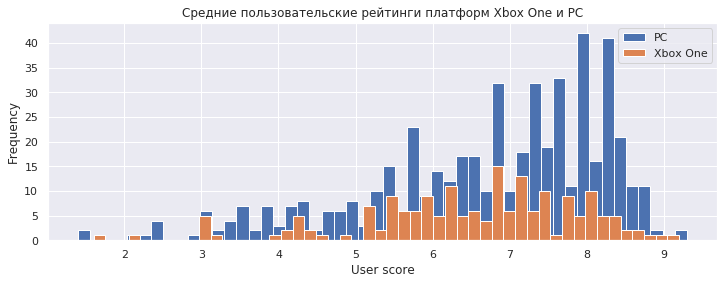

In [42]:
# визуализация распределения средней оценки пользователей по платформам (распределение стремится к нормальному)
ax2 = report.query('platform == "PC"').plot(kind='hist', y='user_score', bins=50, figsize=(12, 4), label='PC')
report.query('platform == "XOne"').plot(kind='hist', y='user_score', bins=50, figsize=(12, 4), 
                                   label='Xbox One', ax=ax2, grid=True, legend=True)
plt.xlabel('User score')
plt.title('Средние пользовательские рейтинги платформ Xbox One и PC')

In [43]:
# Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
pc = report.query('(platform == "PC") and user_score > 0')['user_score']
xone = report.query('(platform == "XOne") and user_score > 0')['user_score']

# критический уровень статистической значимости
alpha = .05

# t-test для двух независимых выборок
results = st.ttest_ind(pc, xone)
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.1295458611061516
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports

In [44]:
report.query('genre == "Action"')['user_score'].agg(['mean', 'std', 'var'])

mean    6.858542
std     1.307452
var     1.709431
Name: user_score, dtype: float64

In [45]:
report.query('genre == "Sports"')['user_score'].agg(['mean', 'std', 'var'])

mean    5.971547
std     1.699826
var     2.889410
Name: user_score, dtype: float64

In [46]:
# проверить количество строк по каждому жанру
print(len(report.query('genre == "Action"')))
len(report.query('genre == "Sports"'))

1380


516

Text(0.5, 1.0, 'Средние пользовательские рейтинги жанров Action и Sports')

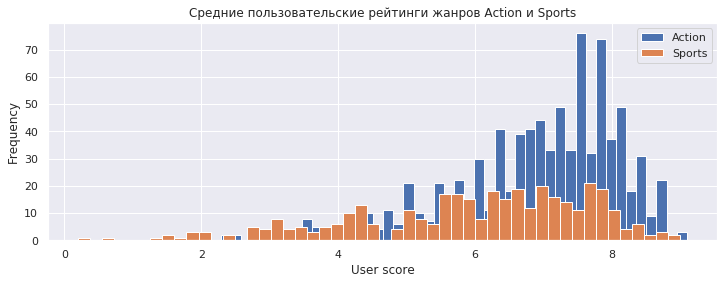

In [47]:
# визуализация распределения средней оценки пользователей по жанрам (распределение стремится к нормальному)
ax3 = report.query('genre == "Action"').plot(kind='hist', y='user_score', bins=50, figsize=(12, 4), label='Action')
report.query('genre == "Sports"').plot(kind='hist', y='user_score', bins=50, 
                                  figsize=(12, 4), label='Sports', ax=ax3, grid=True, legend=True)
plt.xlabel('User score')
plt.title('Средние пользовательские рейтинги жанров Action и Sports')

In [48]:
# Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
action = report.query('(genre == "Action") and user_score > 0')['user_score']
sports = report.query('(genre == "Sports") and user_score > 0')['user_score']

# критический уровень статистической значимости
alpha = .05

# t-test для двух независимых выборок
results = st.ttest_ind(action, sports)
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.49463141114196e-22
Отвергаем нулевую гипотезу


<h3>Вывод</h3>

На этапе проверки гипотез взяты данные по средним пользовательским рейтингам двух платформ и двух жанров.
В качестве нулевой гипотезы взяты гипотезы о равенстве средних пользовательских рейтингов двух пар выборок (игровые платформы Xbox One и PC; жанры Action и Sports):
        
1. Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
2. Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

Альтернативная гипотеза основывается на предположении неравенства этих средних, т.е. средние пользовательские рейтинги платформ Xbox One и PC не равны, а также средние пользовательские рейтинги жанров Action и Sports будут различны.

Критический уровень статистической значимости (alpha) в данной работе равен 5%, как одно из стандартных значений.

Для проверки гипотез о равенстве средних пользовательских рейтингов для независимых выборок использован методо ttest_ind (в отличие, например, от зависимых выборок, когда используется метод .ttest_rel()). Для проверки значимости статистических различий использован т-тест, т.к. есть две независимые выборки, средние значения которых нужно проверить на равенство.

Результаты первой проверки (средние пользовательские рейтинги платформ Xbox One и PC) показали, что различия этих средних статистически не значимы, т.е. нулевая гипотеза не отвергнута. В результате проверки гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports p-value оказалось значительно меньше 5%, что говорит о статистически значимых различиях, позволяющих отвергнуть нулевую гипотезу.

<a id="conclusion"></a>
# 6. Вывод по проекту

В проекте использованы данные о компьютерных играх с 1980 до 2016 годы. В самом начале анализа были преобразованы типы данных в столбцах year_of_release и user_score, пропущенные значения в столбцах name, year_of_release и genre исключены из общего датасета. Столбцы critic_score, user_score и rating содержат от 40% до 51% пропусков, были оставлены без изменений, т.к. в дальнейшем эти данные будут использованы для определения среднего рейтинга и его влияния на продажи. Поэтому важно сохранить среднее и медиану в их первоначальном виде. Пропуски могли возникнуть из-за некорректной выгрузки, непопулярности игры или для игр, вышедших одновременно с большим количеством других. Дополнительно был создан столбец total_sales с глобальными продажами по каждой игре.

Самое большое количество выпущенных игр приходится на 2008 и 2009 год (пиковые значения), после чего рынок компьютерных игр пошел на спад, который мог быть вызван экономическим кризисом и одновременным переформатированием рынка (больший ориентир на онлай-игры).

Самые прибыльные <b>платформы</b>, начиная с 1980 года:

- *PS2 с суммарными продажами на 2127 млн долларов*,
- *DS - 2121 млн долларов*,
- *PS3 - 1306 млн долларов*,
- *Wii - 1286 млн долларов*,
- *X360 - 1232 млн долларов*.

Однако средний срок жизни платформы равен 7.6 лет, значит, к 2016 году большинство игроков на рынке компьютерных игр должно поменяться. В качестве <b>актуального периода</b> выбран отрезок с 2008 по 2016 годы, который включает в себя самые прибыльные 2008 и 2009 годы и последующий период спада уровня продаж. 

Потенциально прибыльными платформами можно обозначить платформы <b>PC, PS4, PSV, WiiU, XOne, 3DS, PS3, X360</b>, т.к. их выручка за прошедший период 2016 года составляет от 13 до 160 $млн. 

Лидеры по продажам в текущем 2016 году:

- платформа PS4 (160 млн долларов),
- платформа XOne (87 млн долларов),
- платформа PSV (85 млн долларов).

Отрицательную динамику по продажам показывают платформы 3DS, PS3, PSV, Wii (6 и 4 млн долларов в 2014 и 2015 годах), WiiU, X360. Положительная динамика характерна для платформ PC, PS4, XOne.

Из анализируемых восьми перспективных платформ самые высокие <b>медианы</b> по продажам: 
- X360 и PS3 (ок. 0.26 млн долларов за игру),
- PS4, XOne и WiiU (ок. 0.24),
- 3DS (ок. 0.12), 
- PC и PSV (ок. 0.05).

Если сравнить показатели медианы со <b>средним значением</b> по каждой платформе, то самые высокие показатели сохраняются за X360 (0.81), затем PS4 (0.8) и PS3 (0.7). Самые низкие остаются за PC и PSV. При этом показатели медианы и среднего отличаются друг от друга в несколько раз, что говорит о наличии значительных выбросов.

В качестве примера взята платформа <b>PS4</b> (входит в тройку лидеров по средней стоимости игры, самая прибыльная платформа за 2015 и 2016 годы). Корреляция между общими продажами и оценкой критиков слабая положительная (0.41), тогда как корреляция между оценками пользователей и общими прожадами близка к нулю (-0.03). Из диаграммы рассеяния видно, что более высокие оценки критиков связаны с более высоким уровнем продаж отдельных игр, хотя в целом зависимость этих показателей незначительна.

По остальным перспективным платформам корреляция следующая: оценка критиков и общие продажи коррелируют на 0.34, рейтинг пользователей и продажи - на 0.08. Т.е. в целом заметна очень слабая положительная связь в первом случае и близкая к нулю - во втором. 

Если говорить о жанрах, то в течение анализируемого периода <b>топ-3 популярных жанров</b> - это Action, Shooter и Sports. В самом конце рейтинга находятся Puzzle и Strategy. Предпочтения пользователи отдают более динамичным играм.

В датасете представлены отдельные даные поп родажам в трех регионах: Северная Америка, Европа, Япония. 

Типичный пользователь, проживающий в <b>Северной Америке</b>, использует платформы X360 (490 млн долларов), PS3 (349), PS4 (108), XOne (93), 3DS (83), выбирает жанры Action, Shooter, Sports, Role-Playing, Misc. Это игры с рейтингом M (материалы игры не подходят для подростков младше 17 лет), E (6+), T (13+), E10+ (от 10 лет и старше). 

Типичный пользователь, проживающий в <b>Европе</b>, использует платформы PS3 (294), X360 (235), PS4 (141), PC (92), 3DS (61), выбирает игры жанров Action, Shooter, Sports (первая тройка совпадает с предпочтениями пользователей из Северной Америки), Role-Playing, Racing.  Основной рейтинг этих игр совпадает с данными по Северной Америке (M, E, T, E10+).

В отличие от Северной Америки и Европы, пользователи в <b>Японии</b> предпочитают платформы 3DS (101), PS3 (74), PSV (22), PS4 (16), WiiU (13), а рейтинг популярных жанров выглядит так: Role-Playing, Action, Shooter, Fighting, Misc. В соответствии с жанрами игр рейтинги начинаются с игр для подростков (T), затем идут M, E, E10+.

Различия в предпочтениях по платформам связаны с тем, что линейка PS (Sony) популярна во всем мире, тогда как поколения игровых консолей Xbox (американская компания Microsoft), 3DS и Wii U (японская компания Nintendo) больше привязаны к отдельным регионам. Поэтому, например, доля X360 в Северной Америке составляет 490 млн долларов, в Европе - 235, а в Японии вообще не входит в топ-5 платформ. В Японии лидирующе место занимает 3DS (101 млн долларов) компании Nintendo.

Жанровые предпочтения можно объяснить культурными особенностями Японии (популярность манги, анимэ, косплеев), что отразилось на выборе ролевых компьютерных игр (RPG) и преобладании игр рейтинга T. 

Как видно из анализа, в Европе и Северной Америке наиболее популярны консоли Xbox, PlayStation, японская 3DS, также в Европе пользователи используют платформу PC. Для Японии рейтинг платформ дополняется  WiiU, а лидером является 3DS. Наиболее часто по регионам встречаются игры жанра Action, Shooter, Role-Playing (особо популярны в Японии). В Америке и Европе пользователи предпочитают жанр Sports, который не популярен среди японских пользователей (но они выбирают Shooter).

На этапе проверки гипотез взяты данные по двум перспективным платформам Xbox One и PC и популярным жанрам Action и Sports.  
В качестве нулевой гипотезы взяты гипотезы о равенстве средних пользовательских рейтингов двух пар выборок (игровые платформы Xbox One и PC; жанры Action и Sports):
        
1. Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
2. Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

Альтернативная гипотеза основывается на предположении неравенства этих средних, т.е. средние пользовательские рейтинги платформ Xbox One и PC не равны, а также средние пользовательские рейтинги жанров Action и Sports будут различны.

Критический уровень статистической значимости (alpha) в данной работе равен 5%, как одно из стандартных значений. Для проверки значимости статистических различий использован т-тест, т.к. есть две независимые выборки, средние значения которых нужно проверить на равенство.

Результаты первой проверки (средние пользовательские рейтинги платформ Xbox One и PC) показали, что различия статистически не значимы, т.е. нулевая гипотеза не отвергнута. В результате проверки гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports p-value оказалось значительно меньше 5%, что говорит о статистически значимых различиях, позволяющих отвергнуть нулевую гипотезу.

<b>Таким образом, потенциально прибыльными платформами можно назвать X360, PS3, XOne, PC, PS4, PSV, WiiU, 3DS, которые входят в рейтинги топ-5 популярных платформ трех изученных регионов. Пользователи отдают предпочтение динамичным жанрам Action, Shooter, Sports и Role-Playing. Основные возрастные категории популярных игр варьируются от 6+ (E), 10+, 13+ (T) и 17+ (M). Однако важно помнить о региональных различиях предпочтений пользователей при разработке кампаний, т.к. в конкретном регионе предпочтения могут отдаваться определенным платформам и жанрам (как, например, в случае с Японией).</b>


<b>Дополнительно</b>

Краткий обзор прибыльных платформ (в порядке убывания):
- Северная Америка: X360, PS3, PS4, XOne, 3DS
- Европа: PS3, X360, PS4, PC, 3DS
- Япония: 3DS, PS3, PSV, PS4, WiiU

Краткий обзор популярных жанров (в порядке убывания):
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc 
- Европа: Action, Shooter, Sports, Role-Playing, Racing
- Япония: Role-Playing, Action, Shooter, Fighting, Misc

Краткий обзор рейтинга игр (в порядке убывания):
- Северная Америка: M, E, T, E10+
- Европа: M, E, T, E10+
- Япония: T, M, E, E10+